In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Save to CSV
data.to_csv("wine_dataset.csv", index=False)

print("Wine dataset has been saved as 'wine_dataset.csv'.")


Wine dataset has been saved as 'wine_dataset.csv'.


In [4]:
# Load the dataset from the saved CSV
wine_data = pd.read_csv("wine_dataset.csv")

# Display the first 5 rows
print("Dataset Preview:")
print(wine_data.head())

# Check for missing values and dataset information
print("\nDataset Info:")
print(wine_data.info())

print("\nCheck for Missing Values:")
print(wine_data.isnull().sum())


Dataset Preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

In [5]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target
X = wine_data.drop(columns=["target"])  # Features
y = wine_data["target"]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Accuracy Score: 1.00


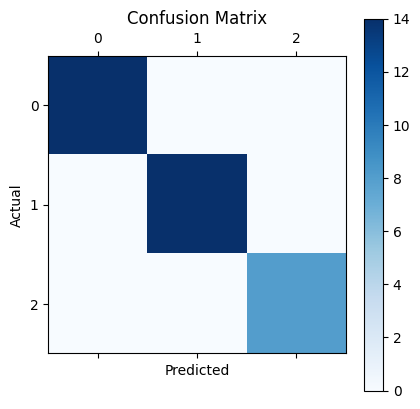

In [7]:
import matplotlib.pyplot as plt

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
